# Objektorientierte Programmierung 

In diesem Notebook befassen wir uns mit dem Konzept der objektorientierten Programmierung. Wir konzentrieren uns auf die Nutzung von Vererbung und Polymorphismus, um unsere Softwarelösung durch die Definition von Subklassen zu erweitern. Diese Techniken ermöglichen es uns, bestehende Klassenfunktionalitäten zu nutzen und gleichzeitig spezifische Verhaltensweisen und Eigenschaften hinzuzufügen, die auf bestimmte Anwendungsfälle zugeschnitten sind.

New post from User1: This is my first post!
User1 is now following User2
Message from User1 to User2: Hello, how are you?
Message received from User1: Hello, how are you?


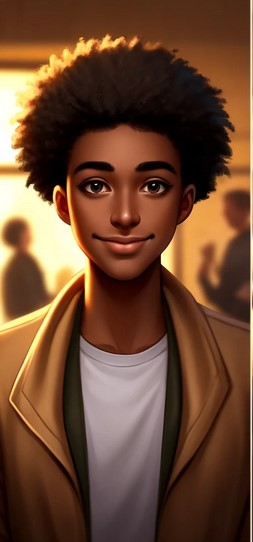

In [15]:
from IPython.display import display
from PIL import Image

class SocialMediaAccount:
    def __init__(self, username, email, profilbild_pfad):
        # Initialize the attributes of the account
        self.username = username
        self.email = email
        self.profilbild_pfad = profilbild_pfad
        self.beitraege = []  # List to store the posts

    def post_erstellen(self, text):
        # Add a new post to the list of posts
        self.beitraege.append(text)
        print(f"New post from {self.username}: {text}")

    def folgen(self, anderer_account):
        # Simulate following another account
        print(f"{self.username} is now following {anderer_account.username}")

    def nachricht_senden(self, anderer_account, nachricht):
        # Send a message to another account
        print(f"Message from {self.username} to {anderer_account.username}: {nachricht}")
        anderer_account.nachricht_empfangen(self, nachricht)  # This line sends the message to be received

    def nachricht_empfangen(self, von_account, nachricht):
        # Receive a message from another account
        print(f"Message received from {von_account.username}: {nachricht}")
        # In a subclass, this method can be overridden to check if the sender is known or not

    def profilbild_anzeigen(self):
        # Display the profile picture
        try:
            with Image.open(self.profilbild_pfad) as img:
                display(img)
        except FileNotFoundError:
            print(f"Profile picture {self.profilbild_pfad} not found.")

    def beitrag_liken(self, beitrag_id):
        # Simulate liking a post
        print(f"Post {beitrag_id} liked.")

# Example of creating accounts and their interactions
account1 = SocialMediaAccount("User1", "user1@example.com", "profilbild1.jpg")
account2 = SocialMediaAccount("User2", "user2@example.com", "profilbild2.jpg")

account1.post_erstellen("This is my first post!")
account1.folgen(account2)
account1.nachricht_senden(account2, "Hello, how are you?")
account1.profilbild_anzeigen()
#account2.profilbild_anzeigen()


Bevor wir unsere Subklasse `PrivateAccount` definieren, betrachten wir, wie sie von der Basisklasse `SocialMediaAccount` erbt und zusätzliche Funktionalitäten einführt, die speziell für private Nutzerkonten gedacht sind. 


Hier folgt die Implementierung der Subklasse:

In [16]:
#run the cell
class PrivateAccount(SocialMediaAccount):
    def __init__(self, username, email, profilbild_pfad):
        super().__init__(username, email, profilbild_pfad)
        self.bekannte_user = []  # A list to store known users

    def user_hinzufuegen(self, anderer_account):
        # Add a user to the list of known users
        if anderer_account not in self.bekannte_user:
            self.bekannte_user.append(anderer_account.username)
            print(f"{anderer_account.username} has been added to known users.")

    def nachricht_empfangen(self, von_account, nachricht):
        # Check if the sender is known and handle the message accordingly
        if von_account.username in self.bekannte_user:
            print(f"Message from a known user {von_account.username}: {nachricht}")
        else:
            print(f"Message from an unknown sender {von_account.username}: {nachricht}")



In [20]:
# run the cell
account3 = PrivateAccount("User3", "user3@example.com", "profilbild2.jpg")
account1.nachricht_senden(account3, "Hello, are you new here?")

Message from User1 to User3: Hello, are you new here?
Message from an unknown sender User1: Hello, are you new here?


In [21]:
# run the cell
account3.user_hinzufuegen(account1)  # Add account1 to the list of known users
# Now send a message from account1 and see the response
account1.nachricht_senden(account3, "Hello, are you new here?")

User1 has been added to known users.
Message from User1 to User3: Hello, are you new here?
Message from a known user User1: Hello, are you new here?




Die PrivateAccount-Klasse implementiert erweiterte Funktionen.
Im Folgenden kannst du das selber ausprobieren indem du eine Subklasse für geschäftskunden erstellst. 

### Übung 

    1. Erweiterung der BusinessAccount-Klasse:
    Erstelle die Subklasse BusinessAccount, die von SocialMediaAccount erbt. Füge spezielle Methoden hinzu, die es ermöglichen, Beiträge als Anzeigen zu schalten und die Effektivität dieser Anzeigen zu verfolgen.

    2. Implementierung von Ad-Tracking:
    Implementiere in der BusinessAccount-Klasse eine Methode, die es erlaubt, Klickzahlen für jede Anzeige zu sammeln und auszugeben. Dies soll helfen, den Erfolg von Marketingkampagnen zu messen.

    3. Massennachrichten-Funktion:
    Füge eine Methode hinzu, die es BusinessAccount ermöglicht, Nachrichten an mehrere Benutzer gleichzeitig zu senden. Dies könnte für Marketingzwecke oder Benachrichtigungen verwendet werden.
    

In [24]:
class BusinessAccount(SocialMediaAccount):
    def __init__(self, username, email, profilbild_pfad):
        super().__init__(username, email, profilbild_pfad)

    def post_als_anzeige_schalten(self, text, kosten):
        # Mark a post as an advertisement and print the cost
        print(f"Ad post by {self.username}: {text}")
        print(f"The cost of this ad is: ${kosten}")


In [25]:
business_account = BusinessAccount("BusinessUser", "business@example.com", "path/to/business_image.jpg")
business_account.post_als_anzeige_schalten("Check out our new product!", 500)
business_account.nachricht_senden(account3, "Interested in our services?")


Ad post by BusinessUser: Check out our new product!
The cost of this ad is: $500
Message from BusinessUser to User3: Interested in our services?
Message from an unknown sender BusinessUser: Interested in our services?


In [29]:
class BusinessAccount(SocialMediaAccount):
    def __init__(self, username, email, profilbild_pfad):
        super().__init__(username, email, profilbild_pfad)
        self.ad_stats = {}  # Dictionary to store advertisement statistics

    def post_als_anzeige_schalten(self, text, kosten):
        # Mark a post as an advertisement and print the cost
        print(f"Ad post by {self.username}: {text}")
        print(f"The cost of this ad is: ${kosten}")
        # Track ad statistics
        if text not in self.ad_stats:
            self.ad_stats[text] = {'costs': kosten, 'clicks': 0}

    def klicks_hinzufuegen(self, text):
        # Increment click counts for a specific ad
        if text in self.ad_stats:
            self.ad_stats[text]['clicks'] += 1
        else:
            print(f"No ad with text '{text}' found.")

    def anzeigen_statistik_berichten(self):
        # Report the statistics of all ads
        for ad, stats in self.ad_stats.items():
            print(f"Ad: {ad}, Costs: ${stats['costs']}, Clicks: {stats['clicks']}")

    def nachricht_an_viele_senden(self, andere_accounts, nachricht):
        # Send a message to multiple accounts
        for account in andere_accounts:
            self.nachricht_senden(account, nachricht)
            print(f"Sent message to {account.username}: {nachricht}")



In [44]:
business_account = BusinessAccount("BusinessUser", "business@example.com", "path/to/business_image.jpg")
business_account.post_als_anzeige_schalten("Check out our new product launch!", 300)
business_account.nachricht_senden(account3, "Interested in our services?")




Ad post by BusinessUser: Check out our new product launch!
The cost of this ad is: $300
Message from BusinessUser to User3: Interested in our services?
Message from an unknown sender BusinessUser: Interested in our services?


In [49]:
business_account.klicks_hinzufuegen("Check out our new product launch!")
business_account.klicks_hinzufuegen("Check out our new product launch!")

In [50]:
business_account.anzeigen_statistik_berichten()


Ad: Check out our new product launch!, Costs: $300, Clicks: 6


In [51]:
# Angenommen, account1 und account2 sind bereits definierte SocialMediaAccount-Instanzen
other_accounts = [account1, account2]
business_account.nachricht_an_viele_senden(other_accounts, "Join us for our latest product webinar!")


Message from BusinessUser to User1: Join us for our latest product webinar!
Message received from BusinessUser: Join us for our latest product webinar!
Sent message to User1: Join us for our latest product webinar!
Message from BusinessUser to User2: Join us for our latest product webinar!
Message received from BusinessUser: Join us for our latest product webinar!
Sent message to User2: Join us for our latest product webinar!
